# Differential Equations

## Euler's Method

$$ \frac{dy}{dx} = f(x,y) $$

For n intervals between the integration limits $(x_0,x)$, 
$$ x_n = x_0 + nh \quad ; (n = 1,2,3,...) $$
By Euler's Formula, 
$$ y_{n+1} = y_n + hf(x_n, y_n) $$

**Algorithm:**

1. Define the function $f(x,y)$.
2. Set interval and initial values of x and y.
3. Update, $$ y = y + hf(x,y) $$  $$ x = x+h $$
    Iterate this in a loop.
4. Collect the (x,y) data.
5. Plot the graph.

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

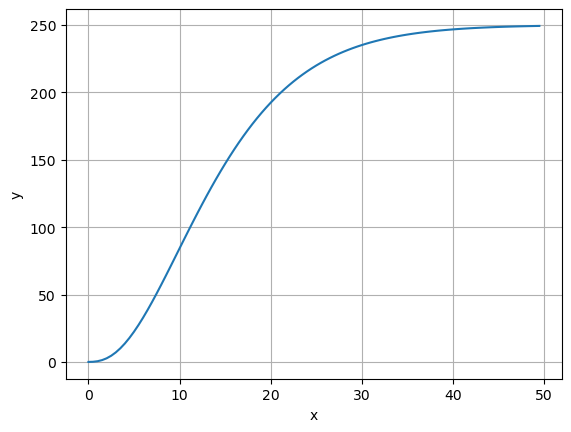

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)

x, y, h = 0, 0, 0.5
xx, yy = [], []

for i in range (100):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
    
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Modified Euler's Method

To get a better approximation by *trapezoidal rule*,
$$ y_{n+1} = y_0 + \frac{h}{2}[f(x_n, y_n) + f(x_{n+1}, y_{n+1})] $$
By applying iteration on this, we can get a better solution.

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

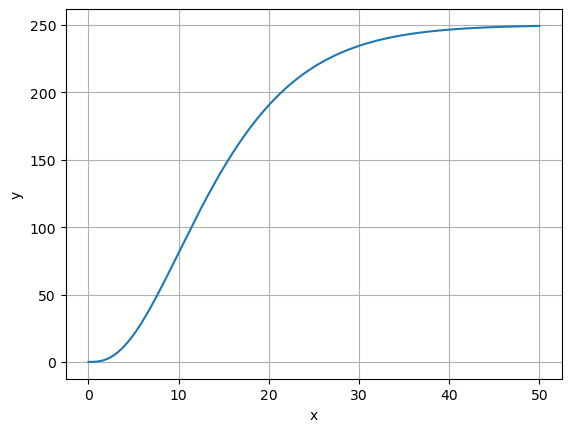

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)
    
xm = 50      # upper limit of x
x, y = 0, 0
h = 0.005
xx, yy = [], []

while abs(x) < abs(xm):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Runge - Kutta Method

Here, the change of y is further modified. Let h and k be the changes in x and y.

$$ k_1 = h f(x,y) $$

$$ k_2 = h f(x + \frac{h}{2}, y + \frac{k_1}{2}) $$

$$ k_3 = h f(x + \frac{h}{2}, y + \frac{k_2}{2}) $$

$$ k_4 = h f(x + h, y + k_3) $$

At last, y should be,
$$ y = y + \frac{1}{6}[k_1 + 2(k_2 + k_3) + k_4] $$

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

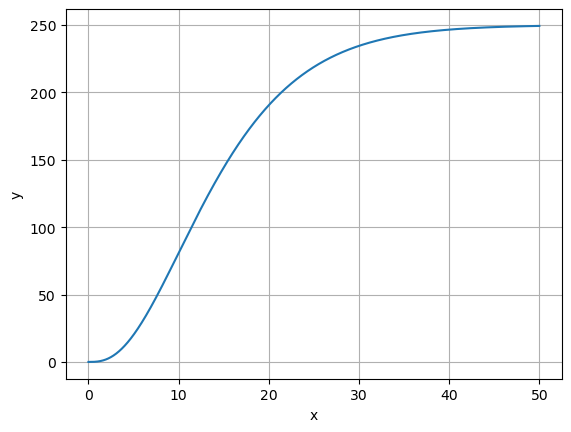

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)
    
xm = 50
x, y = 0, 0
h = 0.005
xx, yy = [], []

while abs(x) < abs(xm):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 2nd Order Differential Equations

**$$ ay'' + by' + cy = 0 \quad; y'=\frac{dy}{dx} $$**

Let, $$ y' = z \quad.......(1)$$ So, $$ az' + bz + cy = 0 \quad.......(2)$$

**Question:** Plot $x-y$ graph for the differential equation,
$$ y'' -4y' +4y =0 $$

**Python Program:**

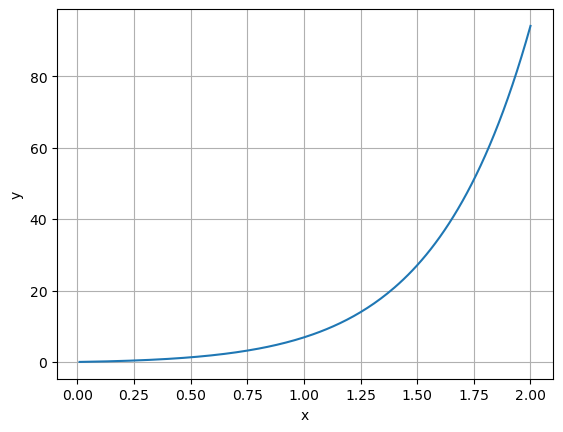

In [4]:
import matplotlib.pyplot as plt

pr = [1,-4,4]   # parameters = [a,b,c]
x,y,z = 0,0,1
xm = 2
dx = 0.01
xx, yy, zz = [], [], []

def dydx(x,y,z):
    return z
def dzdx(x,y,z):
    return (-1/pr[0]) * (pr[1]*z + pr[2]*y)

while abs(x) < abs(xm):
    x = x + dx
    y = y + dx * dydx(x,y,z)
    z = z + dx * dzdx(x,y,z)
    
    xx.append(x)
    yy.append(y)
    zz.append(z)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 3rd Order ODE

**Question:**  $$ y''' -2y'' -y' +2y = x^2 $$

## Numerical Solution by different methods

In [5]:
from scipy.integrate import odeint, solve_ivp

In [6]:
# Write the differential equation. (dy/dx = yp, d2y/dx2 = ypp)

def dSdx(x,S):
    y, yp, ypp = S
    return [yp, ypp, 2*ypp + yp - 2*y + x**2] 

def dydx(x,y,yp,ypp):
    return yp
def dypdx(x,y,yp,ypp):
    return ypp
def dyppdx(x,y,yp,ypp):
    return 2*ypp + yp - 2*y + x**2

x_0, y_0, yp_0, ypp_0 = 0, 0, 0, 0  # initial conditions
x_min, x_max = x_0, 10     # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

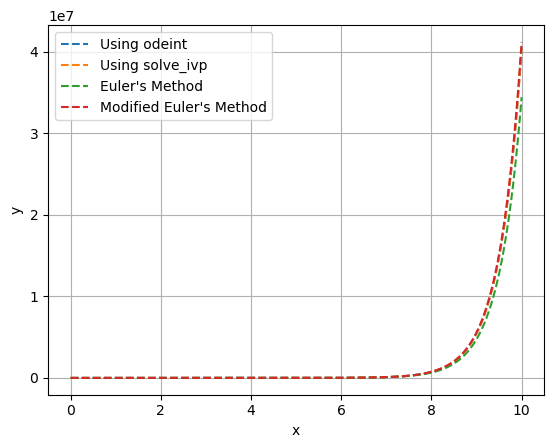

In [7]:
# ALL IN ONE
# Using odeint
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    y += h*dydx(x,y,yp,ypp)
    yp += h*dypdx(x,y,yp,ypp)
    ypp += h*dyppdx(x,y,yp,ypp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    dy = (h/2) * (dydx(x,y,yp,ypp) + 
dydx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dyp = (h/2) * (dypdx(x,y,yp,ypp) + 
dypdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dypp = (h/2) * (dyppdx(x,y,yp,ypp) + 
dyppdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    y += dy
    yp += dyp
    ypp += dypp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Problems

### Question-1.1:
$$ \frac{dy}{dx} = e^{-x} $$ 
Initial condition: $y=0$ for $x=0$.

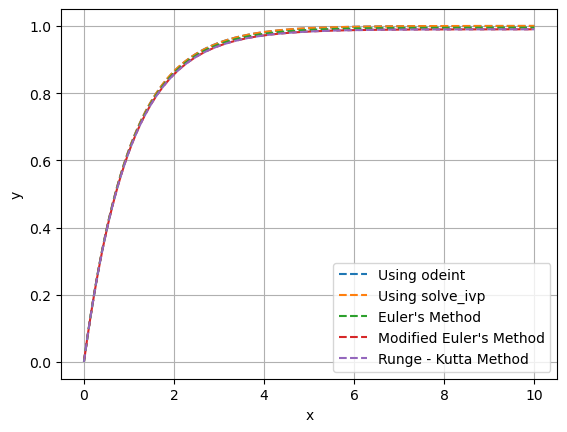

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dydx(x,y):                   # Write the differential equation.
    return np.exp(-x)

y_0 = 0               # initial condition
x_min, x_max = 0, 10   # lower and upper limit of x

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0 = 0, 0         # initial condition
x_max = 10            # upper limit of x

# Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Question-1.2:
$$ \frac{dy}{dx} + e^{-x} = x^2 $$ 
Initial condition: $y=0$ for $x=0$.

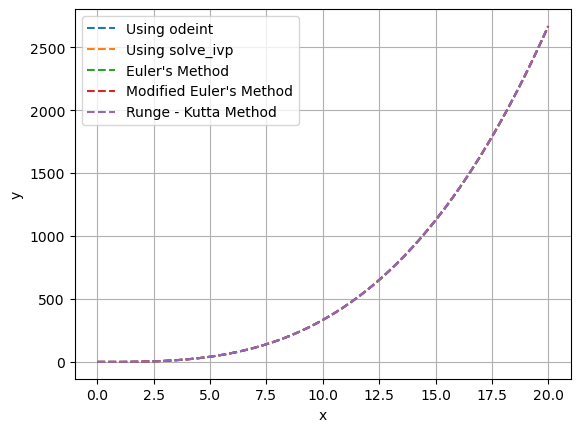

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dydx(x,y):                   # Write the differential equation.
    return -np.exp(-x) + x**2

y_0 = 0               # initial condition
x_min, x_max = 0, 20   # lower and upper limit of x

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0 = 0, 0         # initial condition
x_max = 20            # upper limit of x

# Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Question-1.3:
$$ \frac{d^2y}{dx^2} + 2\frac{dy}{dx} + y = 0 $$ 
Initial condition: $y=1$ for $x=0$.

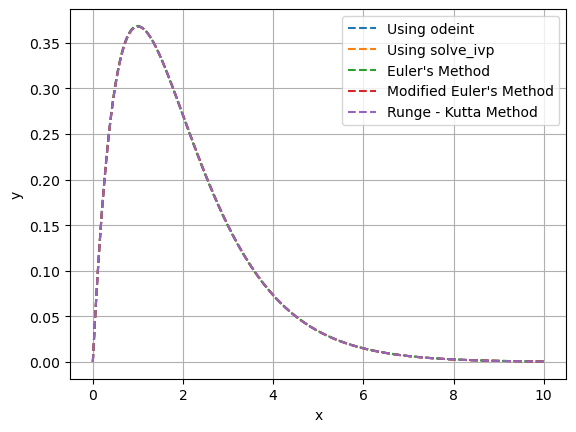

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dSdx(x,S):        # Write the differential equation. (dy/dx = yp)
    y, yp = S
    return [yp, -2*yp - y] 

def dydx(x,y,yp):   # Write the differential equation. (dy/dx = yp)
    return yp
def dypdx(x,y,yp):
    return -2*yp - y

y_0, yp_0 = 0, 1      # initial condition for y and dy/dx
x_min, x_max = 0, 10   # lower and upper limit of x

# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0, yp_0 = 0, 0, 1  # initial condition for y and dy/dx
x_max = 10            # upper limit of x

# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + 
dydx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + 
dypdx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()